In [2]:
from vectorhash import build_vectorhash_architecture
import torch
import torchvision
from torchvision import transforms
from vectorhash_functions import space_filling_curve
import matplotlib.pyplot as plt
from data_utils import prepare_data
from smoothing import SoftmaxSmoothing

transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Lambda(lambda x: x.flatten())]
)

mnist = torchvision.datasets.MNIST(
    root="data", train=True, download=True, transform=transform
)

vhash = build_vectorhash_architecture(
    shapes=[(3,3), (5,5), (7,7)],
    N_h=1000,
    input_size=784,
    initalization_method="by_scaling",
    W_gh_var=1,
    percent_nonzero_relu=0.5,
    sparse_initialization=0.1,
    smoothing=SoftmaxSmoothing(T=1e-6),
    device=torch.device("cpu"),
    hippocampal_sensory_layer_type="iterative_pseudoinverse",
    hidden_layer_factor=1,
    stationary=True,
    epsilon_hs=0.1,
    epsilon_sh=0.1,
)

num_imgs = 2000

by_scaling
module shapes:  [(3, 3), (5, 5), (7, 7)]
N_g     :  83
N_patts :  11025
N_h     :  1000


In [3]:
mnist_data, noisy_mnist_data =prepare_data(mnist, num_imgs=num_imgs, preprocess_sensory=True, noise_level="none", across_dataset=False)

# velocities = space_filling_curve([[3,3], [5,5], [7,7]])

# vhash.learn_path(observations=mnist_data, velocities=velocities[:num_imgs])
# recalled_imgs = vhash.recall(noisy_mnist_data)
# recalled_imgs = recalled_imgs.reshape(-1, 1, 28, 28)

# for i in range(num_imgs):
#     recalled_img = recalled_imgs[i].squeeze().detach().numpy()
#     recalled_img = recalled_img.reshape(28, 28)
#     plt.imshow(recalled_img, cmap="gray")
#     plt.show()
    

/Users/Ile-Maurice/Library/Python/3.10/lib/python/site-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


In [5]:
from test_utils import dynamics_patts, capacity_test
import numpy as np


relu=[False,True]


err_h_l2_results = np.zeros(
    (
        len(relu),
        len([100, 400, 600, 800, 900, 1000, 1100, 1200, 1300, 1400, 1700])
    ),
)
err_s_l2_results = np.zeros(
    (
        len(relu),
        len([100, 400, 600, 800, 900, 1000, 1100, 1200, 1300, 1400, 1700])
    ),
)
err_s_l1_results = np.zeros(
    (
        len(relu),
        len([100, 400, 600, 800, 900, 1000, 1100, 1200, 1300, 1400, 1700])
    ),
)


Npatts_list = [100, 400, 600, 800, 900, 1000, 1100, 1200, 1300, 1400, 1700]
for i, relus in enumerate(relu):
    errs2, errh, errs = capacity_test(
        sbook=mnist_data,
        Npatts_list=Npatts_list,
        nruns=1,
        device=torch.device("cpu"),
        sign_output=False,
        shapes=[(3,3), (5,5), (7,7)],
        N_h=1000,
        input_size=784,
        initalization_method="by_scaling",
        W_gh_var=1,
        percent_nonzero_relu=0.7,
        sparse_initialization=0.1,
        smoothing_method=SoftmaxSmoothing(T=1e-6),
        hippocampal_sensory_layer_type="iterative_pseudoinverse",
        hidden_layer_factor=1,
        stationary=True,
        epsilon_hs=0.1,
        epsilon_sh=0.1,
        relu=relus,
    )
    err_h_l2_results[i] = errh.reshape(-1)
    err_s_l2_results[i] = errs2.reshape(-1)
    err_s_l1_results[i] = errs.reshape(-1)

by_scaling
module shapes:  [(3, 3), (5, 5), (7, 7)]
N_g     :  83
N_patts :  11025
N_h     :  1000


  0%|          | 0/11 [00:00<?, ?it/s]/Users/Ile-Maurice/Desktop/rl-research-main/rl-research/vectorhash/hippocampal_sensory_layers.py:104: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3729.)
  1 + input.T @ self.inhibition_matrix_hs @ input
  9%|▉         | 1/11 [00:01<00:19,  1.97s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.]])


 18%|█▊        | 2/11 [00:10<00:51,  5.78s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


 27%|██▋       | 3/11 [00:23<01:11,  8.89s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


 36%|███▋      | 4/11 [00:37<01:18, 11.15s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


 45%|████▌     | 5/11 [00:55<01:20, 13.43s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


 55%|█████▍    | 6/11 [01:35<01:53, 22.77s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


 64%|██████▎   | 7/11 [02:21<02:00, 30.24s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


 73%|███████▎  | 8/11 [03:50<02:26, 48.90s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


 82%|████████▏ | 9/11 [04:31<01:32, 46.36s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


 91%|█████████ | 10/11 [05:13<00:45, 45.17s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


100%|██████████| 11/11 [06:07<00:00, 33.43s/it]


tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.]])
by_scaling
module shapes:  [(3, 3), (5, 5), (7, 7)]
N_g     :  83
N_patts :  11025
N_h     :  1000


  9%|▉         | 1/11 [00:01<00:17,  1.78s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.]])


 18%|█▊        | 2/11 [00:12<01:05,  7.28s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


 27%|██▋       | 3/11 [00:39<02:07, 15.89s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


 36%|███▋      | 4/11 [01:36<03:45, 32.21s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


 45%|████▌     | 5/11 [02:24<03:48, 38.10s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


 55%|█████▍    | 6/11 [03:04<03:12, 38.52s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.]])


 64%|██████▎   | 7/11 [03:32<02:20, 35.19s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.]])


 73%|███████▎  | 8/11 [04:13<01:50, 36.92s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


 82%|████████▏ | 9/11 [05:20<01:32, 46.33s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.]])


 91%|█████████ | 10/11 [06:28<00:53, 53.27s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.]])


100%|██████████| 11/11 [07:55<00:00, 43.20s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.]])


Text(0.5, 1.0, 'MI per inp bit vs num patts (N_h=1000, sparsity=0.1)')

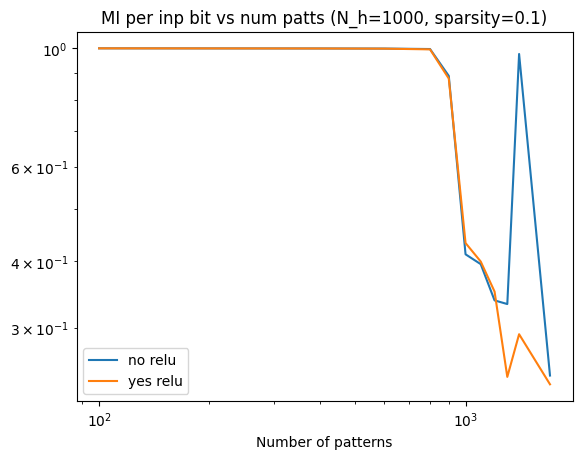

In [6]:


for i, relus in enumerate(relu):
        normlizd_l1 = err_s_l1_results[i]
        m = 1 - (2 * normlizd_l1)
        a = (1 + m) / 2
        b = (1 - m) / 2
        a = torch.abs(torch.tensor(a))
        b = torch.abs(torch.tensor(b)).cpu()
        S = -a * np.log2(a) - b * np.log2(b)
        S = np.where(m == 1, np.zeros_like(S), S)
        MI = 1 - S

        label = "yes relu" if relus else "no relu"
        plt.plot(Npatts_list,MI, label=label)
x = np.arange(len(Npatts_list))
plt.xticks(x, Npatts_list)
plt.xlabel("Number of patterns")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.title(
    f"MI per inp bit vs num patts (N_h=1000, sparsity=0.1)"
)
